 **Quantitative Features (Features with numerical values)**
    
---year (int64): The vehicle's manufacturing year.

---condition (float64): The condition of the vehicle (likely on a numerical scale).

---odometer (float64): The vehicle's mileage.

---mmr (float64): The Manheim Market Report value (estimated market value).

---sellingprice (float64): The final price at which the vehicle was sold.

**Qualitative Features (Features with categorical values)**

---make (object): The vehicle's brand/manufacturer.

---model (object): The vehicle's specific model.

---trim (object): Additional specification within the model.

---body (object): The vehicle's body type (e.g., Sedan, SUV, etc.).

---transmission (object): The type of transmission (e.g., automatic, manual).

---vin (object): The vehicle's unique Vehicle Identification Number.

---state (object): The state where the vehicle is registered.

---color (object): The vehicle's exterior color.

---interior (object): The vehicle's interior color.

---seller (object): The entity that sold the vehicle.

---saledate (object): The date and time of the sale.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("C:\\Users\\Usuario\\Desktop\\MIGUEL\\LIBROS DE ESTUDIO\\PROGRAMACIÓN\\CURSO DE PYTHON\\proyectos de practica de analisis de datos\\Datasets\\car_prices.csv")

In [4]:
#  se trabaja en una copia para no afectar el original en caso que se deba revisar el original 
df_car_sales = df.copy()

In [5]:
df_car_sales.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [6]:
df_car_sales.shape

(558837, 16)

In [7]:
df_car_sales.dtypes.sort_values()

year              int64
condition       float64
odometer        float64
mmr             float64
sellingprice    float64
make             object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
color            object
interior         object
seller           object
saledate         object
dtype: object

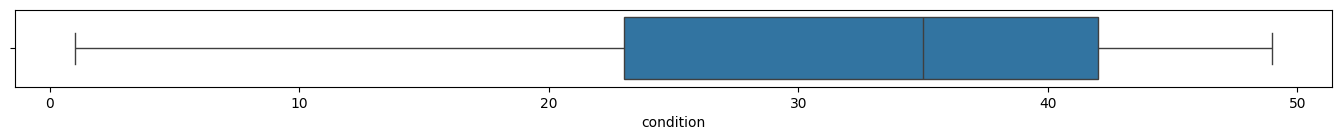

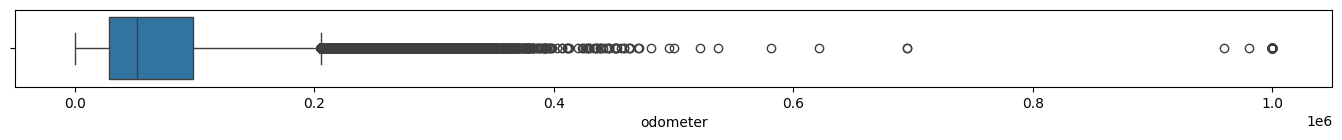

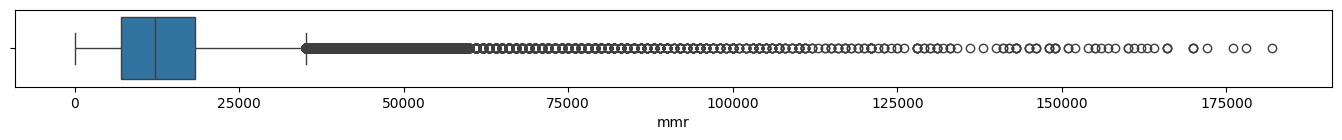

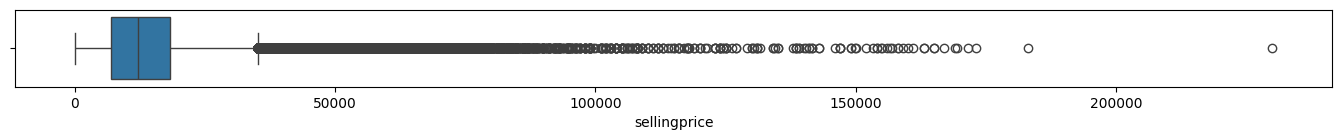

In [8]:
num_cols = df_car_sales.select_dtypes(include='float').columns

for col in num_cols:
    plt.figure(figsize =(17,1))
    sns.boxplot(data=df_car_sales[num_cols], x=col)


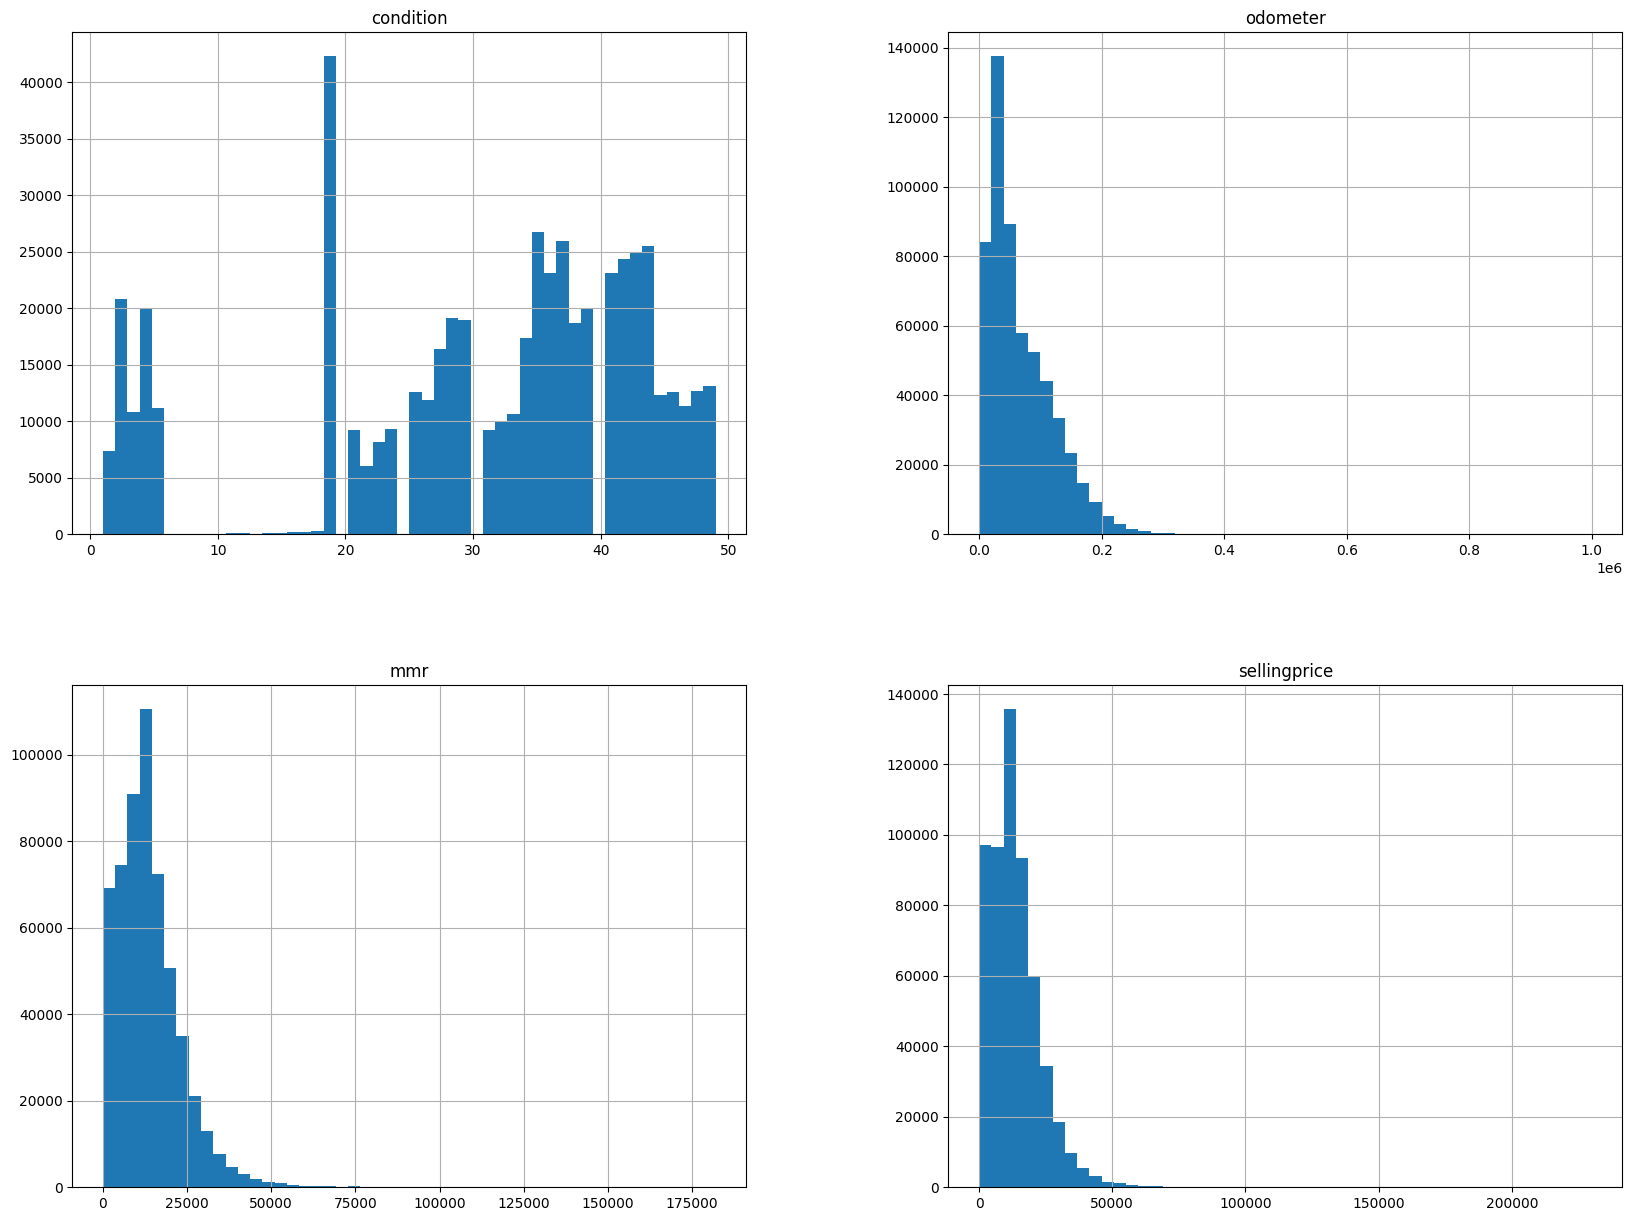

In [9]:
df_car_sales[num_cols].hist(bins=50, figsize=(20,15))
plt.show()

## Limpieza de Datos

In [10]:
missing_values = pd.DataFrame(df_car_sales.isnull().sum().sort_values(ascending=False)).reset_index()
missing_values.columns = ['Variables', 'Missing Values']

In [11]:
missing_values

,Variables,Missing Values
0,transmission,65352
1,body,13195
2,condition,11820
3,trim,10651
4,model,10399
5,make,10301
6,color,749
7,interior,749
8,odometer,94
9,mmr,38


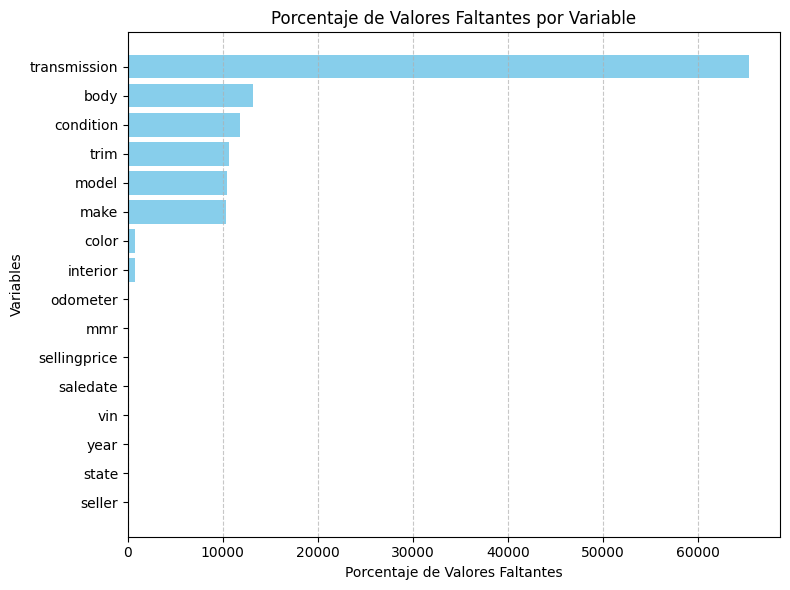

In [12]:
plt.figure(figsize=(8, 6))  # Tamaño del gráfico
plt.barh(missing_values['Variables'], missing_values['Missing Values'], color='skyblue')
plt.xlabel('Porcentaje de Valores Faltantes')
plt.ylabel('Variables')
plt.title('Porcentaje de Valores Faltantes por Variable')
plt.gca().invert_yaxis() 
plt.grid(axis='x', linestyle='--', alpha=0.7)  
plt.tight_layout()  
plt.show()

In [13]:
def fill_null_with_column_mean(df):
    for column in df.columns:
        if df[column].dtype == 'float64' or df[column].dtype == 'int64':
            median_value = df[column].median()
            df[column].fillna(median_value, inplace=True)

    return df

In [14]:
df_car_sales= fill_null_with_column_mean(df_car_sales)

In [15]:
#ahora se sustituye los datos tipo objeto por la moda 
df_car_sales.select_dtypes(include='object').mode()

,make,model,trim,body,transmission,vin,state,color,interior,seller,saledate
0,Ford,Altima,Base,Sedan,automatic,automatic,fl,black,black,nissan-infiniti lt,Tue Feb 10 2015 01:30:00 GMT-0800 (PST)


In [16]:
def fill_na_with_mode(df):
    for column in df.select_dtypes(include=['object']).columns:
        mode_value = df[column].mode()[0]  # Obtiene la moda de la columna
        df[column].fillna(mode_value, inplace=True)
    return df

In [17]:
# se sustituye los valores nulos por la moda en las variables tipo object
df_car_sales = fill_na_with_mode(df_car_sales)

In [18]:
#cantidad de datos de las variables 
df_car_sales.select_dtypes(include=['object']).nunique()

make                96
model              973
trim              1963
body                87
transmission         4
vin             550297
state               64
color               46
interior            17
seller           14263
saledate          3766
dtype: int64

Revisemos cada variable en busca de datos erróneos en su sintaxis, de esta manera disminuimos los valores únicos

In [19]:
df_car_sales['make'].unique()

array(['Kia', 'BMW', 'Volvo', 'Nissan', 'Chevrolet', 'Audi', 'Ford',
       'Hyundai', 'Buick', 'Cadillac', 'Acura', 'Lexus', 'Infiniti',
       'Jeep', 'Mercedes-Benz', 'Mitsubishi', 'Mazda', 'MINI',
       'Land Rover', 'Lincoln', 'lincoln', 'Jaguar', 'Volkswagen',
       'Toyota', 'Subaru', 'Scion', 'Porsche', 'bmw', 'Dodge', 'FIAT',
       'Chrysler', 'ford', 'Ferrari', 'Honda', 'GMC', 'mitsubishi', 'Ram',
       'smart', 'chevrolet', 'Bentley', 'chrysler', 'pontiac', 'Pontiac',
       'Saturn', 'Maserati', 'Mercury', 'HUMMER', 'landrover', 'cadillac',
       'land rover', 'mercedes', 'mazda', 'toyota', 'lexus', 'gmc truck',
       'honda', 'nissan', 'porsche', 'Saab', 'Suzuki', 'dodge', 'subaru',
       'Oldsmobile', 'oldsmobile', 'hyundai', 'jeep', 'Isuzu', 'dodge tk',
       'Geo', 'acura', 'volkswagen', 'suzuki', 'kia', 'audi',
       'Rolls-Royce', 'gmc', 'maserati', 'mazda tk', 'mercury', 'buick',
       'hyundai tk', 'mercedes-b', 'vw', 'Daewoo', 'chev truck',
       'ford t

In [20]:
# Lista de marcas tal como aparece en df_car_sales['make'].unique()
unique_makes = df_car_sales['make'].unique()

# Crear un diccionario para mapear las marcas originales a las marcas con formato de título
title_case_mapping = {make: make.title() for make in unique_makes}

# Aplicar el mapeo a la columna 'make' del DataFrame
df_car_sales['make'] = df_car_sales['make'].map(title_case_mapping)

# Verificar los resultados
print(df_car_sales['make'].unique())


['Kia' 'Bmw' 'Volvo' 'Nissan' 'Chevrolet' 'Audi' 'Ford' 'Hyundai' 'Buick'
 'Cadillac' 'Acura' 'Lexus' 'Infiniti' 'Jeep' 'Mercedes-Benz' 'Mitsubishi'
 'Mazda' 'Mini' 'Land Rover' 'Lincoln' 'Jaguar' 'Volkswagen' 'Toyota'
 'Subaru' 'Scion' 'Porsche' 'Dodge' 'Fiat' 'Chrysler' 'Ferrari' 'Honda'
 'Gmc' 'Ram' 'Smart' 'Bentley' 'Pontiac' 'Saturn' 'Maserati' 'Mercury'
 'Hummer' 'Landrover' 'Mercedes' 'Gmc Truck' 'Saab' 'Suzuki' 'Oldsmobile'
 'Isuzu' 'Dodge Tk' 'Geo' 'Rolls-Royce' 'Mazda Tk' 'Hyundai Tk'
 'Mercedes-B' 'Vw' 'Daewoo' 'Chev Truck' 'Ford Tk' 'Plymouth' 'Ford Truck'
 'Tesla' 'Airstream' 'Dot' 'Aston Martin' 'Fisker' 'Lamborghini' 'Lotus']


In [21]:
# corregimos las sintaxis 
df_car_sales.loc[df_car_sales['make']== 'Ford Tk', 'make'] = 'Ford Truck'
df_car_sales.loc[df_car_sales['make']== 'Chev Truck', 'make'] = 'Chevrolet Truck'
df_car_sales.loc[df_car_sales['make']== 'Vw', 'make'] = 'VW'
df_car_sales.loc[df_car_sales['make']== 'Hyundai Tk', 'make'] = 'Hyundai Truck'
df_car_sales.loc[df_car_sales['make']== 'Mazda Tk', 'make'] = 'Mazda Truck'
df_car_sales.loc[df_car_sales['make']== 'Dodge Tk', 'make'] = 'Dodge Truck'
df_car_sales.loc[df_car_sales['make']== 'Gmc Truck', 'make'] = 'GMC Truck'
df_car_sales.loc[df_car_sales['make']== 'Gmc', 'make'] = 'GMC'

In [22]:
# repetimos el proceso para 'model'
df_car_sales['model'].unique()

array(['Sorento', '3 Series', 'S60', '6 Series Gran Coupe', 'Altima',
       'M5', 'Cruze', 'A4', 'Camaro', 'A6', 'Optima', 'Fusion', 'Sonata',
       'Q5', '6 Series', 'Impala', '5 Series', 'A3', 'XC70', 'X5', 'SQ5',
       'S5', 'Verano', 'Suburban', 'ELR', 'V60', 'X6', 'ILX', 'K900',
       'Malibu', 'RX 350', 'Versa', 'Elantra', 'Versa Note', 'A8', 'X1',
       'Enclave', 'TTS', '4 Series', 'Silverado 2500HD', 'MDX',
       'Silverado 1500', 'SRX', 'G Coupe', 'G Sedan', 'FX', 'Santa Fe',
       'Genesis', 'Equus', 'Sonata Hybrid', 'Accent', 'Veloster',
       'Elantra Coupe', 'Azera', 'Tucson', 'Genesis Coupe', 'Wrangler',
       'S-Class', 'GS 350', 'Outlander', 'C-Class', 'Mazda2', 'Rio', 'M',
       '370Z', 'Soul', 'Outlander Sport', 'SLK-Class', 'ES 350',
       'E-Class', 'Mazda3', 'Cooper Clubman', 'Cooper', 'CX-9', 'Forte',
       'Compass', 'JX', 'RX 450h', 'LR4', 'Mazda5', 'Range Rover Evoque',
       'LS 460', 'GLK-Class', 'Sportage', 'Grand Cherokee', 'MKX', 'mkt',
     

In [23]:
# repetimos el proceso para 'model'
unique_model = df_car_sales['model'].unique()

title_case_mapping = {model: model.title() for model in unique_model}

df_car_sales['model'] = df_car_sales['model'].map(title_case_mapping)

In [24]:
# repetimos el proceso para 'model'
df_car_sales['body'].unique()

array(['SUV', 'Sedan', 'Convertible', 'Coupe', 'Wagon', 'Hatchback',
       'Crew Cab', 'G Coupe', 'G Sedan', 'Elantra Coupe', 'Genesis Coupe',
       'Minivan', 'Van', 'Double Cab', 'CrewMax Cab', 'Access Cab',
       'King Cab', 'SuperCrew', 'CTS Coupe', 'Extended Cab',
       'E-Series Van', 'SuperCab', 'Regular Cab', 'G Convertible', 'Koup',
       'Quad Cab', 'CTS-V Coupe', 'sedan', 'G37 Convertible', 'Club Cab',
       'Xtracab', 'Q60 Convertible', 'CTS Wagon', 'convertible',
       'G37 Coupe', 'Mega Cab', 'Cab Plus 4', 'Q60 Coupe', 'Cab Plus',
       'Beetle Convertible', 'TSX Sport Wagon', 'Promaster Cargo Van',
       'GranTurismo Convertible', 'CTS-V Wagon', 'Ram Van', 'minivan',
       'suv', 'Transit Van', 'Navitgation', 'van', 'regular-cab',
       'g sedan', 'g coupe', 'hatchback', 'king cab', 'supercrew',
       'g convertible', 'coupe', 'crew cab', 'wagon', 'double cab',
       'e-series van', 'regular cab', 'quad cab', 'g37 convertible',
       'supercab', 'extended c

In [25]:
unique = df_car_sales['body'].unique()

title_case_mapping = {body: body.title() for body in unique}

df_car_sales['body'] = df_car_sales['body'].map(title_case_mapping)

In [26]:
# # repetimos el proceso para 'transmission' 
df_car_sales['transmission'].unique() # Aaah pero sorpresa hay datos incongruentes 

array(['automatic', 'manual', 'Sedan', 'sedan'], dtype=object)

In [27]:
df_car_sales['transmission'].value_counts()

transmission
automatic    541267
manual        17544
sedan            15
Sedan            11
Name: count, dtype: int64

In [28]:
# antes de ver el dataframe completo en 'transmission' coloquemos primero 'sedan'a 'Sedan'pasando a ser un conteo de 26 
df_car_sales.loc[df_car_sales['transmission'] == 'sedan', 'transmission'] = 'Sedan'

In [29]:
df_car_sales.loc[df_car_sales['transmission'] == 'Sedan']

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
408161,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Navitgation,Sedan,automatic,3vwd17aj4fm201708,35.0,46.0,4802,silver,gray,12250.0,13200.0,16500
417835,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Navitgation,Sedan,automatic,3vwd17aj2fm258506,35.0,1.0,9410,white,gray,12250.0,13300.0,10500
421289,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Navitgation,Sedan,automatic,3vwd17aj3fm276741,35.0,46.0,1167,blue,black,12250.0,13200.0,12700
424161,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Navitgation,Sedan,automatic,3vwd17aj2fm285365,35.0,1.0,2172,gray,black,12250.0,14050.0,8250
427040,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Navitgation,Sedan,automatic,3vwd17aj0fm227318,35.0,41.0,14872,gray,black,12250.0,13700.0,14300
427043,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Navitgation,Sedan,automatic,3vwd17aj6fm218641,35.0,49.0,12655,red,black,12250.0,13850.0,14500
434424,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Navitgation,Sedan,automatic,3vwd17aj7fm223475,35.0,46.0,15719,blue,black,12250.0,13650.0,13500
444501,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Navitgation,Sedan,automatic,3vwd17aj5fm297123,35.0,2.0,6388,white,black,12250.0,13850.0,10700
453794,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Navitgation,Sedan,automatic,3vwd17aj5fm219943,35.0,44.0,16633,silver,black,12250.0,13600.0,13600
461597,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Navitgation,Sedan,automatic,3vwd17aj9fm219766,35.0,44.0,11034,black,black,12250.0,13900.0,13000


In [30]:
df_cars = df_car_sales['make'].value_counts().reset_index()
df_cars.columns = ['cars', 'count']
df_cars.loc[df_cars['cars'] == 'Volkswagen']

,cars,count
13,Volkswagen,12605


Parece un error de carga de los datos en el dataset que se origina en la columna **trim y body**  siendo el error **SE PZEV w/Connectivity, Navitgation** respectivamente, haciendo que las demás variables sus datos se corran hacia el lado derecho. La opción es eliminar esa sección de los datos que solo afecta al 'Volkswagen' con un conteo de 26 datos afectados.

In [31]:
df_car_sales = df_car_sales.drop(range(408161, 461613))

In [32]:
df_car_sales['condition'].unique() #aqui estamos bien

array([ 5., 45., 41., 43.,  1., 34.,  2., 42.,  3., 48., 35., 49., 17.,
       19., 29., 38., 44., 47., 32.,  4., 25., 37., 39., 31., 28., 46.,
       36., 26., 21., 22., 27., 24., 33., 23., 15., 16., 18., 12., 14.,
       11., 13.])

In [33]:
df_car_sales['odometer'].unique() # aqui estamos bien

array([ 16639.,   9393.,   1331., ..., 204835., 111069., 262065.])

In [34]:
df_car_sales['color'].unique() # al parecer se repiten los errores 

array(['white', 'gray', 'black', 'red', 'silver', 'blue', 'brown',
       'beige', 'purple', 'burgundy', '—', 'gold', 'yellow', 'green',
       'charcoal', 'orange', 'off-white', 'turquoise', 'pink', 'lime',
       '6864', '339', '18384', '9887', '9837', '20379', '20627', '721',
       '6158', '2817', '5705', '18561', '2846', '9562', '5001'],
      dtype=object)

In [35]:
values_to_drop = ['6864', '339', '18384', '9887', '9837', '20379', '20627', '721', '6158', '2817', '5705', '18561', '2846', '9562', '5001']

df_car_sales = df_car_sales[~df_car_sales['color'].isin(values_to_drop)]

In [36]:
df_car_sales.loc[df_car_sales['color'] == '—', 'color'] = 'No Color'

In [37]:
df_car_sales['interior'].unique()

array(['black', 'beige', 'tan', '—', 'gray', 'brown', 'burgundy', 'white',
       'silver', 'off-white', 'blue', 'red', 'yellow', 'green', 'purple',
       'orange', 'gold'], dtype=object)

In [38]:
df_car_sales.loc[df_car_sales['interior'] == '—', 'interior'] = 'No Color'

In [39]:
df_car_sales['trim'].unique() #aqui omitere los datos ya que a la final se descartara 'trim' para el modelo de predicion 

array(['LX', '328i SULEV', 'T5', ..., 'C John Varvatos Luxury', 'EWB',
       'Power Wagon'], dtype=object)

In [40]:
df_car_sales['seller'].unique() # este me servira para el modelo de prediccion 

array(['kia motors america  inc',
       'financial services remarketing (lease)',
       'volvo na rep/world omni', ..., 'maserati north america inc',
       'alternative financial group inc', 'i -5 uhlmann rv'], dtype=object)

In [41]:
df_car_sales['state'].unique()

array(['ca', 'tx', 'pa', 'mn', 'az', 'wi', 'tn', 'md', 'fl', 'ne', 'nj',
       'nv', 'oh', 'mi', 'ga', 'va', 'sc', 'nc', 'in', 'il', 'co', 'ut',
       'mo', 'ny', 'ma', 'pr', 'or', 'la', 'wa', 'hi', 'qc', 'ab', 'on',
       'ok', 'ms', 'nm', 'al', 'ns'], dtype=object)

In [42]:
df_car_sales.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,Suv,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,Suv,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,Bmw,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,Bmw,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


# Eliminar los Outliers

In [43]:
from scipy import stats

In [44]:
df_car_sales.select_dtypes(include=['float64', 'int64']).std()

year                3.999476
condition          13.300460
odometer        53882.063265
mmr              9643.170246
sellingprice     9723.475643
dtype: float64

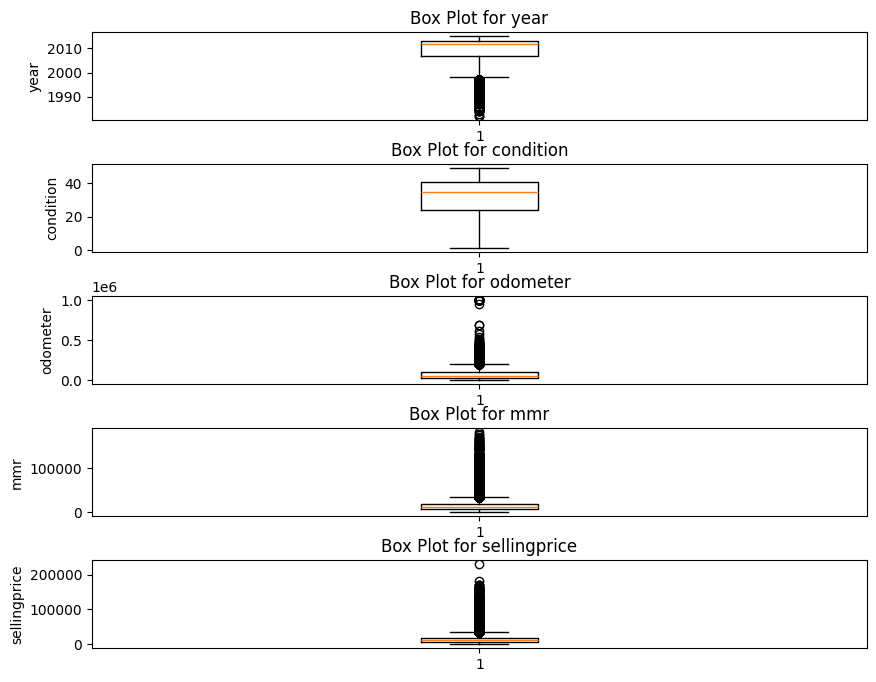

In [45]:
numerical_columns = df_car_sales.select_dtypes(include=['float64', 'int64']).columns

fig, axes = plt.subplots(nrows=len(numerical_columns), ncols=1, figsize=(10, 8))
fig.subplots_adjust(hspace=0.5)

for i, column in enumerate(numerical_columns):
    axes[i].boxplot(df_car_sales[column].dropna())
    axes[i].set_title(f'Box Plot for {column}')
    axes[i].set_ylabel(column)

plt.show()

Se utiliza el puntaje Z, también conocido como **"Z-score"**, es una medida estadística que indica cuántas desviaciones estándar un dato está por encima o por debajo de la media de un conjunto de datos. Se utiliza comúnmente en la estadística para estandarizar datos y detectar valores atípicos.

**Interpretación del puntaje Z:**

Valor positivo de Z: Indica que el dato está por encima de la media.

Valor negativo de Z: Indica que el dato está por debajo de la media.

Valor de Z igual a 0: Indica que el dato es igual a la media.

Magnitud del valor Z: Cuanto mayor sea el valor absoluto del puntaje Z, más lejos está el dato de la media.

**Usos del puntaje Z:**

Estandarización: Convierte diferentes conjuntos de datos en un formato común, permitiendo comparaciones directas entre datos provenientes de diferentes distribuciones.
Detección de valores atípicos (outliers): Los datos con puntajes Z muy altos o muy bajos (por ejemplo, más de 2 o 3 desviaciones estándar de la media) se consideran valores atípicos.


In [46]:
# Remove outliers using Z-score
numerical_columns = df_car_sales.select_dtypes(include=['float64', 'int64']).columns

z_scores = stats.zscore(df_car_sales[numerical_columns])
df_car_sales = df_car_sales[(z_scores < 2).all(axis=1)]
df_car_sales.shape

(462874, 16)

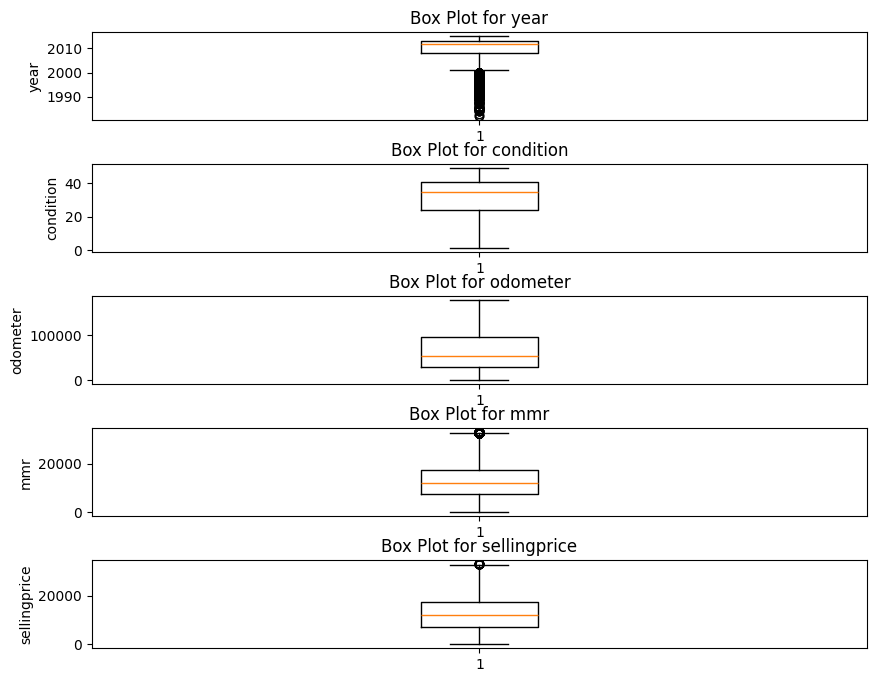

In [47]:
fig, axes = plt.subplots(nrows=len(numerical_columns), ncols=1, figsize=(10, 8))
fig.subplots_adjust(hspace=0.5)

for i, column in enumerate(numerical_columns):
    axes[i].boxplot(df_car_sales[column].dropna())
    axes[i].set_title(f'Box Plot for {column}')
    axes[i].set_ylabel(column)

plt.show()

# Normalizar y Escalar los datos

In [48]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

def normalize_features(df_car_sales):
    # Copy the original DataFrame to avoid modifying the input
    normalized_df = df_car_sales.copy()

    # Numerical columns to be normalized
    numerical_cols = ['year', 'condition', 'odometer', 'mmr']

    # Categorical columns to be encoded
    categorical_cols = [col for col in df_car_sales.columns if col not in numerical_cols]

    # Normalize numerical features using Min-Max Scaling
    scaler_dict = {}
    for col in numerical_cols:
        scaler = MinMaxScaler()
        normalized_df[col] = scaler.fit_transform(df_car_sales[[col]])
        scaler_dict[col] = scaler

    # Encode categorical features using Label Encoding
    label_encoders = {}
    for col in categorical_cols:
        le = LabelEncoder()
        normalized_df[col] = le.fit_transform(df_car_sales[col])
        label_encoders[col] = le

    # Encode the target column
    target_col = 'sellingprice'
    if target_col in df_car_sales.columns:
        normalized_df[target_col] = label_encoders[target_col].transform(df_car_sales[target_col])
        label_encoders[target_col] = le  # Add the target encoder to the dictionary

    return normalized_df, scaler_dict, label_encoders

In [49]:
normalized_df, scaler_dict, label_encoders = normalize_features(df_car_sales)

In [50]:
normalized_df

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,1.000000,24,645,895,36,0,337882,3,0.083333,0.093886,18,2,6535,0.624427,768,1522
1,1.000000,24,645,895,36,0,337875,3,0.083333,0.052998,18,1,6535,0.633588,768,1522
2,0.969697,2,8,273,33,0,423091,3,0.916667,0.007505,8,2,4511,0.972519,1008,1024
3,1.000000,53,592,1261,33,0,452715,3,0.833333,0.080586,18,2,12539,0.838168,948,1119
5,1.000000,38,69,116,33,0,159781,3,0.000000,0.031335,8,2,4177,0.467176,400,1588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558830,0.909091,38,610,65,33,0,269319,32,0.520833,0.202337,18,7,8438,0.302290,378,2945
558831,0.878788,2,26,433,33,0,425205,5,0.791667,0.374700,18,4,6821,0.618321,805,1898
558833,0.909091,43,6,999,7,0,242354,36,0.083333,0.306928,18,2,5878,0.920611,1025,2938
558835,1.000000,38,69,116,33,0,159225,6,0.770833,0.093994,18,2,4177,0.459542,407,1154


# Analisis de datos

In [51]:
normalized_df.select_dtypes(include=('float', 'int')).var()

year            1.290661e-02
make            2.444049e+02
model           4.508521e+04
trim            1.496359e+05
body            7.054257e+01
transmission    3.064235e-02
vin             1.731483e+10
state           1.334633e+02
condition       7.415985e-02
odometer        6.080227e-02
color           4.399565e+01
interior        1.409371e+01
seller          1.380331e+07
mmr             4.841012e-02
sellingprice    6.459996e+04
saledate        7.791051e+05
dtype: float64

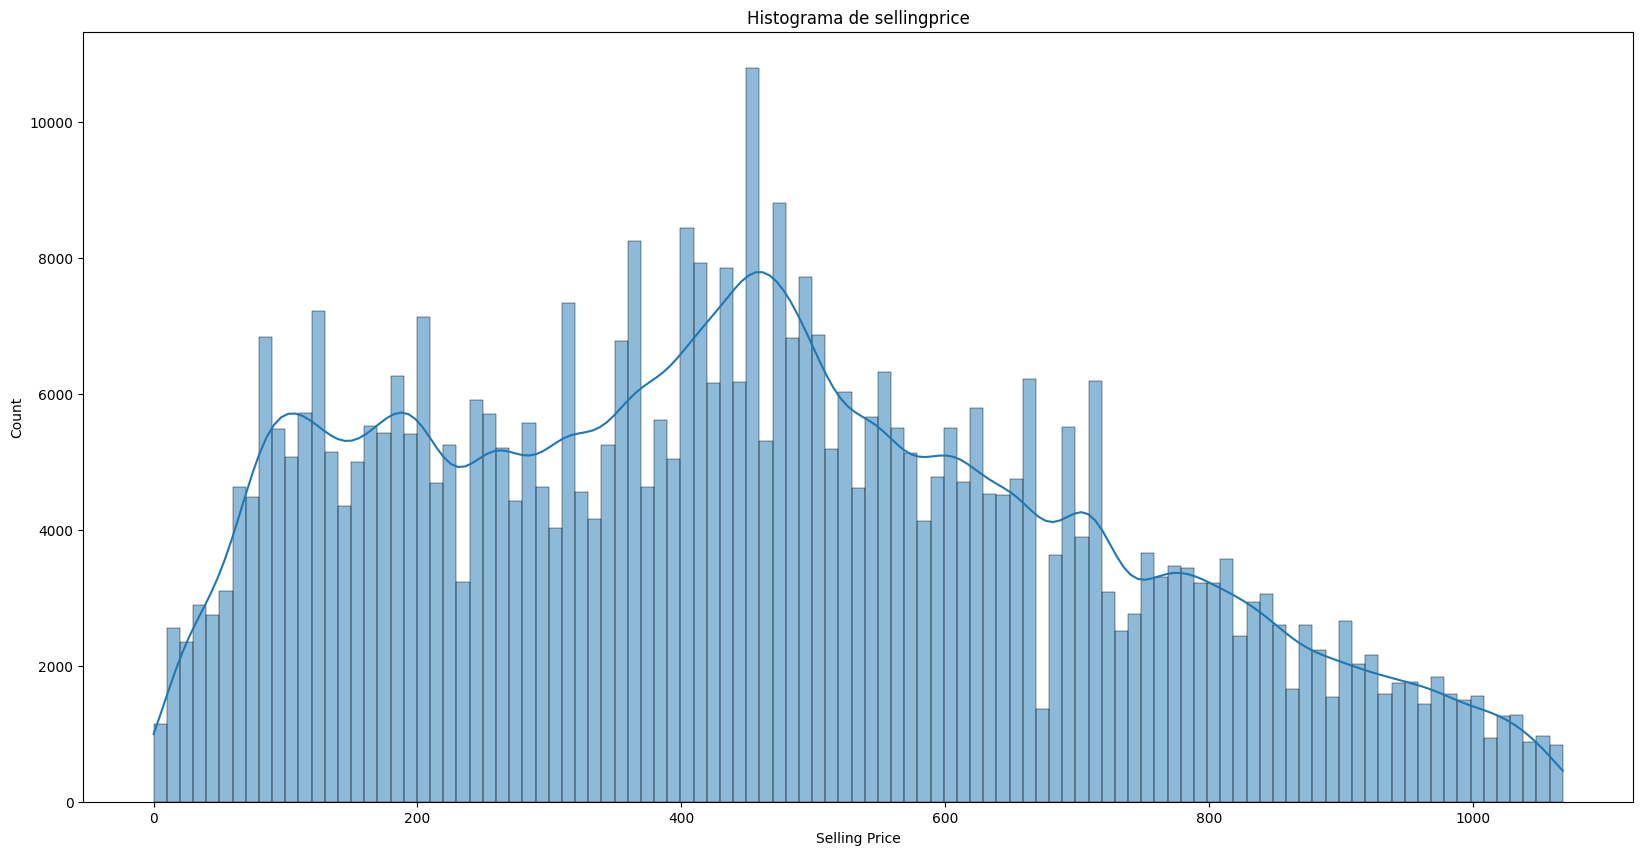

In [52]:
ax = sns.histplot(data=normalized_df, x='sellingprice', kde=True)
ax.figure.set_size_inches(20, 10)
ax.set_title('Histograma de sellingprice')
ax.set_xlabel('Selling Price')

plt.show()

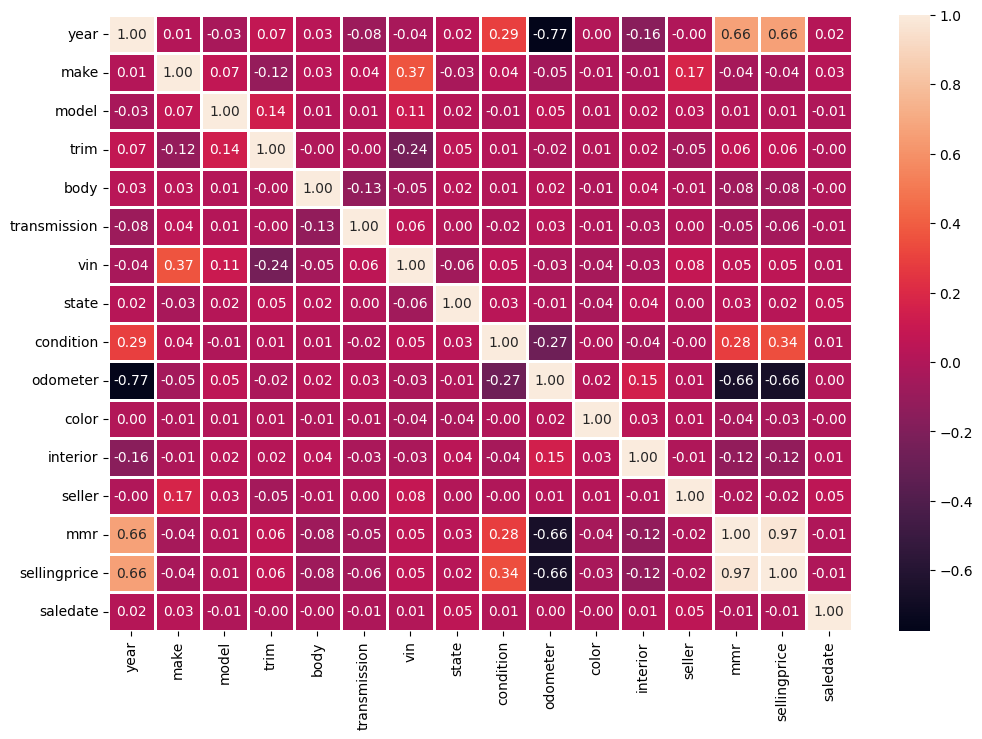

In [53]:
# ahora observemos su correlaccion 
corr = normalized_df.select_dtypes(include=('float', 'int')).corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt=".2f", linewidth=.8)
plt.show()

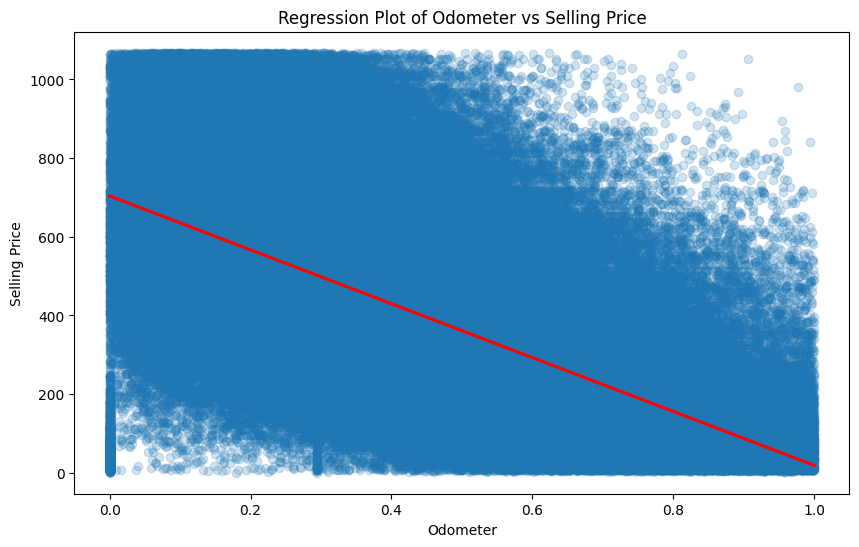

In [54]:
plt.figure(figsize=(10, 6))  

sns.regplot(data=normalized_df, x='odometer', y='sellingprice', scatter_kws={'alpha':0.2}, line_kws={'color':'red'})

plt.xlabel('Odometer')
plt.ylabel('Selling Price')
plt.title('Regression Plot of Odometer vs Selling Price')

plt.show()

Al parecer los datos de las variables no están tan dispersos con respecto a la media, también hay una buena relación con la
variable objetivo que es el caso del precio de Venta. 

Además, vemos que existe una relación inversamente proporcional con la variable kilometraje y el precio de venta, se puede deber a diversos factores como por ejemplo, la percepción de mayor desgaste, costos de mantenimiento más altos, menor fiabilidad, y la reducción de la vida útil del vehículo. Por lo que, esta relación es una de las más importantes para predecir el precio de venta del vehículo. 

# Tomar la muestra

In [55]:
# Se toma una muestra del 50% de la poblacion df el cual no tiene outliers
df_muestra = normalized_df.sample(frac=0.5,random_state=1,ignore_index=True)

# Se eliminan las variables que consideramos que no son utiles para el modelo predictivo 
df_muestra.drop(['trim','vin', 'seller', 'saledate'],axis=1,inplace=True)

Media de la Muestra: 454.4762505563069
Desviación Estándar de la Muestra: 254.5279795812968
Error Estándar de la Media: 0.529077307289164
Coeficiente de Variación: 0.5600468215220022
Intervalo de Confianza del 95.0%: (453.43927266579306, 455.5132284468208)


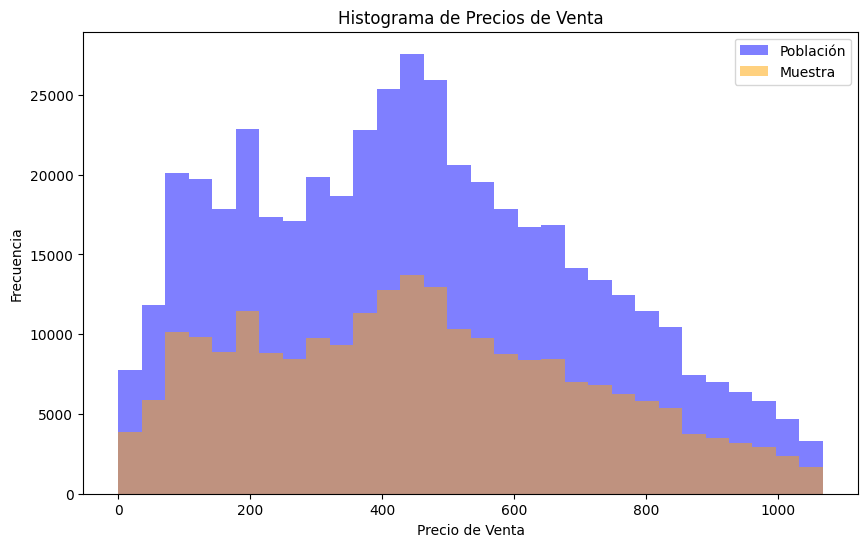

In [56]:
import scipy.stats as stats

# Datos de ejemplo
muestra = df_muestra['sellingprice']
poblacion = normalized_df['sellingprice']

# Parámetros de la muestra
media_muestra = np.mean(muestra)
std_muestra = np.std(muestra, ddof=1)
n = len(muestra)

# Nivel de confianza
confianza = 0.95

# Calcular el intervalo de confianza
error_margen = stats.t.ppf((1 + confianza) / 2, n - 1) * (std_muestra / np.sqrt(n))
intervalo_confianza = (media_muestra - error_margen, media_muestra + error_margen)

# Calcular el error estándar de la media
sem = std_muestra / np.sqrt(n)

# Calcular el coeficiente de variación
cv = std_muestra / media_muestra

print(f"Media de la Muestra: {media_muestra}")
print(f"Desviación Estándar de la Muestra: {std_muestra}")
print(f"Error Estándar de la Media: {sem}")
print(f"Coeficiente de Variación: {cv}")
print(f"Intervalo de Confianza del {confianza*100}%: {intervalo_confianza}")

# Graficar histogramas
plt.figure(figsize=(10, 6))
plt.hist(poblacion, bins=30, alpha=0.5, color='blue', label='Población')
plt.hist(muestra, bins=30, alpha=0.5, color='orange', label='Muestra')
plt.title('Histograma de Precios de Venta')
plt.xlabel('Precio de Venta')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()


## Modelo de Regresión lineal 

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold,cross_val_score
from sklearn.linear_model import LinearRegression


In [58]:
# antes de realizar la división de los datos creare otra copia para no afectar lo ya realizado o si se deba
# modificar algo anteriormente. 
df_rl = df_muestra.copy()

### Division de los Datos

In [59]:
#variables independientes
X = df_rl.drop(['sellingprice'], axis=1)

#variable dependiente
y = df_rl['sellingprice']

In [60]:
#división en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [61]:
#Inicializando el modelo
lr = LinearRegression()

In [62]:
#Entrenamiento
lr.fit(X_train, y_train)

LinearRegression()

In [63]:
#Prueba
predictions_train = lr.predict(X_train) 
predictions_test = lr.predict(X_test)

In [64]:
#Resultados de la predicción
predictions_train

array([595.58647889, 468.19079168, 153.94281932, ..., 485.98100494,
       136.42306853, 698.06990102])

In [65]:
predictions_test

array([399.53354197, 521.75170332, 780.84176107, ..., 223.19700968,
       773.01716541, 113.16368876])

In [66]:
print(predictions_train.shape)
print(predictions_test.shape)

(138862,)
(92575,)


### Metricas de Desempeño del modelo 

In [67]:
#importar las bibliotecas
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import max_error

In [68]:
# Lista de métricas
metricas = [
    ('Coeficiente de Determinación (R^2)', r2_score),
    ('Error Absoluto Medio (MAE)', mean_absolute_error),
    ('Error medio cuadrado (MSE)', mean_squared_error),
    ('Raíz cuadrada del error cuadrático medio (RMSE)', root_mean_squared_error),
    ('Error porcentual absoluto medio (MAPE)', mean_absolute_percentage_error),
    ('Median absolute error (MedAE)', median_absolute_error),
    ('Error Maximo (Max Error)', max_error)
]

# Cálculos de las métricas de evaluación del modelo en un bucle for
for nombre_metrica, metrica_funcion in metricas:
    print(nombre_metrica + ':')
    print('  Entrenamiento:', metrica_funcion(y_train, predictions_train))
    print('  Prueba:', metrica_funcion(y_test, predictions_test))
    print('='*80)


Coeficiente de Determinación (R^2):
  Entrenamiento: 0.9554242196449876
  Prueba: 0.9544418548491709
Error Absoluto Medio (MAE):
  Entrenamiento: 36.599187403083526
  Prueba: 36.9790467992974
Error medio cuadrado (MSE):
  Entrenamiento: 2884.2067063137633
  Prueba: 2956.963865561439
Raíz cuadrada del error cuadrático medio (RMSE):
  Entrenamiento: 53.704810830257685
  Prueba: 54.3779722457673
Error porcentual absoluto medio (MAPE):
  Entrenamiento: 8808044249940.654
  Prueba: 0.15661341213774183
Median absolute error (MedAE):
  Entrenamiento: 26.241624501667616
  Prueba: 26.46067418840073
Error Maximo (Max Error):
  Entrenamiento: 962.5676876638126
  Prueba: 857.9359193383198


In [69]:
mean_absolute_percentage_error(y_train, predictions_train)

8808044249940.654

In [70]:
# corrección del calculo de MAPE para el entrenamiento

# Imputación con el promedio de valores no ceros
non_zero_mean = np.mean(y_train[y_train != 0])
y_train_imputed = np.where(y_train == 0, non_zero_mean, y_train)

# Cálculo del MAPE con valores imputados
mape = np.mean(np.abs((y_train_imputed - predictions_train) / y_train_imputed))
print(f'MAPE para el entrenamiento: {mape}')


MAPE para el entrenamiento: 0.15690767082060436


## Validación cruzada

In [71]:
kf=KFold(n_splits=5,shuffle=True,random_state=0)

resultados = cross_val_score(lr, X, y, cv=kf)

In [72]:
resultados

array([0.95615331, 0.95473052, 0.95466736, 0.95443373, 0.95512393])

## Evaluación visual del modelo de regresión lineal 

In [73]:
from sklearn.metrics import PredictionErrorDisplay
from sklearn.model_selection import cross_val_predict

In [74]:
y_pred = cross_val_predict(lr, X, y, cv=5)

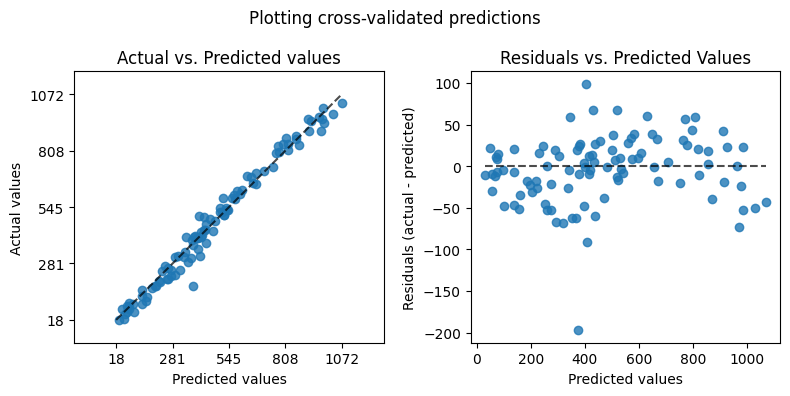

In [75]:
fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
PredictionErrorDisplay.from_predictions(
    y,
    y_pred=y_pred,
    kind="actual_vs_predicted",
    subsample=100,
    ax=axs[0],
    random_state=0,
)
axs[0].set_title("Actual vs. Predicted values")
PredictionErrorDisplay.from_predictions(
    y,
    y_pred=y_pred,
    kind="residual_vs_predicted",
    subsample=100,
    ax=axs[1],
    random_state=0,
)
axs[1].set_title("Residuals vs. Predicted Values")
fig.suptitle("Plotting cross-validated predictions")
plt.tight_layout()
plt.show()

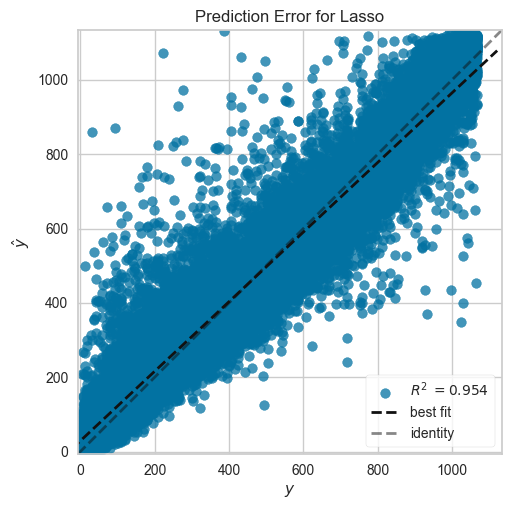

<Axes: title={'center': 'Prediction Error for Lasso'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [85]:
from sklearn.linear_model import Lasso
from yellowbrick.regressor import PredictionError


# Instantiate the linear model
model = Lasso()

# Create the prediction error visualizer
visualizer = PredictionError(model)

# Fit the training data
visualizer.fit(X_train, y_train)

# Score the model on test data
visualizer.score(X_test, y_test)

# Show the visualization
visualizer.show()

## Random Forest para Regresión

In [86]:
from sklearn.ensemble import RandomForestRegressor

In [87]:
rf = RandomForestRegressor(random_state=42, max_depth=5, n_estimators=10)

In [88]:
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=10, random_state=42)

In [89]:
prediccion_rf = rf.predict(X_test)

In [90]:
#coeficiente de determinación
r2_rf = r2_score(y_test, prediccion_rf)
r2_rf

0.9558214614265976

c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


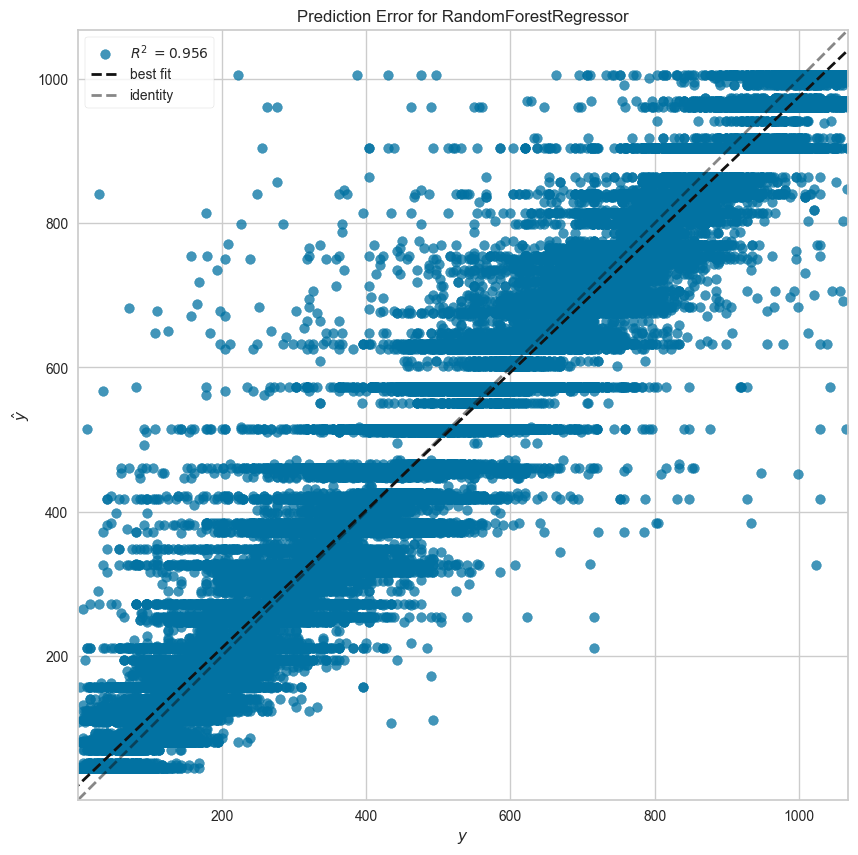

<Axes: title={'center': 'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [91]:
fig, ax = plt.subplots(figsize=(10, 10))

pev = PredictionError(rf)
pev.fit(X_train, y_train)
pev.score(X_test, y_test)
pev.poof()

# Conclusión 

De manera general, el modelo de regresión lineal presenta un rendimiento muy robusto, con un ajuste preciso y buena capacidad de generalización. Las métricas de error (MAE, MSE, RMSE) son bajas y consistentes entre los conjuntos de entrenamiento y prueba, y el R^2 alto indica que el modelo captura bien la variabilidad en los datos. Aunque el error máximo es relativamente alto, esto es esperable y no impacta negativamente la evaluación global del modelo. En resumen, el modelo es efectivo y fiable para realizar predicciones en este contexto.